## TP n° 1 : Génération de contenu musical au format MIDI avec ```miditoolkit```
### - Partie 1 : Création d'un fichier MIDI

In [1]:
import numpy as np
from miditoolkit.constants import DEFAULT_BPM
import miditoolkit as mt
from miditoolkit.midi import parser as mid_parser
from miditoolkit.midi import containers as ct
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
np.random.seed(123)


In [2]:
class MIDIGenerator:
    def __init__(self):
        self.mido_obj = mt.MidiFile()
        self.beat_resol = self.mido_obj.ticks_per_beat

    def create_instrument(self):
        track = mt.Instrument(program=0, is_drum=False, name='example instrument')
        self.mido_obj.instruments = [track]

    def create_note(self, start=0, ticks=4, pitch=60, velocity=100):
        print(f"ticks: {ticks} -> {int(self.beat_resol * ticks)} use {self.beat_resol} ticks per beat")
        end = int(self.beat_resol * ticks)
        note = mt.Note(start=start, end=end, pitch=pitch, velocity=velocity)
        self.mido_obj.instruments[0].notes.append(note)

    def create_marker(self, time=0, text='example marker'):
        marker = mt.Marker(time=time, text=text)
        self.mido_obj.markers.append(marker)

    def write_to_file(self, file_path):
        self.mido_obj.dump(file_path)

    def reload_and_check(self, file_path):
        mido_obj_re = mt.MidiFile(file_path)
        for note in mido_obj_re.instruments[0].notes:
            print(note)

        print('\nmarker:', mido_obj_re.markers)

    def show_image(self, image_path):
        try:
            img = mpimg.imread(image_path)
            imgplot = plt.imshow(img)
            plt.axis('off')  # Hide axes
            plt.tight_layout()
            plt.show()
        except FileNotFoundError:
            print(f"Error: File not found at path '{image_path}'.")

    def create_midi(self, midi_name, plot_name):
        self.create_instrument()
        self.create_note()
        self.create_marker()
        self.write_to_file(midi_name)
        self.reload_and_check(midi_name)
        # self.show_image(plot_name)

    
midi_generator = MIDIGenerator()
print(f"Default ticks per beat in miditoolkit: {midi_generator.beat_resol}\n")

filename = 'midi/one_note.midi' #@param

midi_generator.create_instrument()
midi_generator.create_note()
midi_generator.create_marker()
midi_generator.write_to_file(filename)
midi_generator.reload_and_check(filename)

Default ticks per beat in miditoolkit: 480

ticks: 4 -> 1920 use 480 ticks per beat
Note(velocity=100, pitch=60, start=0, end=1920)

marker: [Marker(text="example marker", time=0)]


In [3]:
def chromatic(dec=False):
    midi_generator = MIDIGenerator()

    filename = f'midi/chromatique_notes.midi'
    start_pitch = 60
    num_notes = 12
    pitch_step = 2
    
    if dec:
        pitch_step = -pitch_step
        filename = f'midi/chromatique_notes_dec.midi'
    
    
    pitches = [start_pitch + i * pitch_step for i in range(num_notes)]
    durations = list(np.array([0.125, 0.25, 0.5, 1, 2, 4]) * midi_generator.beat_resol)

    midi_generator.create_instrument()

    prev_end = 0
    print(pitches)
    for pitch in pitches:
        start = prev_end
        duration = np.random.choice(durations)
        end = start + int(duration)
        velocity = np.random.randint(1, 127)

        note = mt.Note(start=start, end=end, pitch=pitch, velocity=velocity)
        midi_generator.mido_obj.instruments[0].notes.append(note)

        prev_end = end

    midi_generator.create_marker(prev_end, 'End of the song')
    midi_generator.write_to_file(filename)
    midi_generator.reload_and_check(filename)
    print("End")


chromatic()
chromatic(dec=True)

[60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82]
Note(velocity=67, pitch=60, start=0, end=1920)
Note(velocity=99, pitch=62, start=1920, end=2880)
Note(velocity=84, pitch=64, start=2880, end=3000)
Note(velocity=124, pitch=66, start=3000, end=3240)
Note(velocity=87, pitch=68, start=3240, end=3360)
Note(velocity=97, pitch=70, start=3360, end=3480)
Note(velocity=48, pitch=72, start=3480, end=3600)
Note(velocity=33, pitch=74, start=3600, end=3720)
Note(velocity=112, pitch=76, start=3720, end=3780)
Note(velocity=84, pitch=78, start=3780, end=3900)
Note(velocity=37, pitch=80, start=3900, end=5820)
Note(velocity=81, pitch=82, start=5820, end=5880)

marker: [Marker(text="End of the song", time=5880)]
End
[60, 58, 56, 54, 52, 50, 48, 46, 44, 42, 40, 38]
Note(velocity=50, pitch=60, start=0, end=960)
Note(velocity=3, pitch=58, start=960, end=1440)
Note(velocity=40, pitch=56, start=1440, end=2400)
Note(velocity=85, pitch=54, start=2400, end=2640)
Note(velocity=62, pitch=52, start=2640, end=2700)
No

In [4]:
def arbitrary(tones, dec=False):
    midi_generator = MIDIGenerator()

    filename = 'midi/arbitrary_notes.midi'

    pitches = tones
    durations = list(np.array([1, 2, 4]) * midi_generator.beat_resol)
    
    if dec:
        filename = 'midi/arbitrary_notes_dec.midi'
        pitches = list(reversed(pitches))

    midi_generator.create_instrument()

    prev_end = 0
    print(pitches)
    for pitch in pitches:
        start = prev_end
        duration = np.random.choice(durations)
        end = start + int(duration)
        velocity = np.random.randint(1, 127)

        note = mt.Note(start=start, end=end, pitch=pitch, velocity=velocity)
        midi_generator.mido_obj.instruments[0].notes.append(note)

        prev_end = end

    midi_generator.create_marker(prev_end, 'End of the song')
    midi_generator.write_to_file(filename)
    midi_generator.reload_and_check(filename)
    print("End")

tones = [60, 90, 70, 80, 100, 110, 120]
arbitrary(tones)
arbitrary(tones, dec=True)

[60, 90, 70, 80, 100, 110, 120]
Note(velocity=4, pitch=60, start=0, end=480)
Note(velocity=70, pitch=90, start=480, end=2400)
Note(velocity=76, pitch=70, start=2400, end=2880)
Note(velocity=59, pitch=80, start=2880, end=4800)
Note(velocity=23, pitch=100, start=4800, end=6720)
Note(velocity=19, pitch=110, start=6720, end=7680)
Note(velocity=16, pitch=120, start=7680, end=8160)

marker: [Marker(text="End of the song", time=8160)]
End
[120, 110, 100, 80, 70, 90, 60]
Note(velocity=109, pitch=120, start=0, end=960)
Note(velocity=53, pitch=110, start=960, end=2880)
Note(velocity=110, pitch=100, start=2880, end=4800)
Note(velocity=81, pitch=80, start=4800, end=6720)
Note(velocity=15, pitch=70, start=6720, end=8640)
Note(velocity=104, pitch=90, start=8640, end=9120)
Note(velocity=72, pitch=60, start=9120, end=11040)

marker: [Marker(text="End of the song", time=11040)]
End


In [5]:
def create_random_notes():
    midi_generator = MIDIGenerator()

    filename = 'midi/random_notes.midi'

    pitches = np.random.randint(60, 72, size=10)  # Random pitches between C4 (60) and C5 (71)

    durations = list(np.array([0.5, 1, 2, 4]) * midi_generator.beat_resol)

    midi_generator.create_instrument()

    prev_end = 0
    for pitch in pitches:
        start = prev_end
        duration = np.random.choice(durations)
        end = start + int(duration)
        velocity = np.random.randint(1, 127)

        note = mt.Note(start=start, end=end, pitch=pitch, velocity=velocity)
        midi_generator.mido_obj.instruments[0].notes.append(note)

        prev_end = end
    
    midi_generator.create_marker(prev_end, 'End of the song')
    midi_generator.write_to_file(filename)
    midi_generator.reload_and_check(filename)
    print("End")

create_random_notes()

Note(velocity=19, pitch=61, start=0, end=240)
Note(velocity=2, pitch=71, start=240, end=720)
Note(velocity=45, pitch=70, start=720, end=2640)
Note(velocity=106, pitch=65, start=2640, end=3120)
Note(velocity=57, pitch=67, start=3120, end=3360)
Note(velocity=50, pitch=69, start=3360, end=5280)
Note(velocity=4, pitch=62, start=5280, end=6240)
Note(velocity=12, pitch=64, start=6240, end=8160)
Note(velocity=90, pitch=68, start=8160, end=8640)
Note(velocity=106, pitch=61, start=8640, end=10560)

marker: [Marker(text="End of the song", time=10560)]
End


### - Partie 2 : Analyse d'un fichier MIDI

In [6]:
midi_file = "midi/shanxi-802.mid"
midi_generator = MIDIGenerator()
midi_generator.reload_and_check(midi_file)
# midi_generator.show_image("figures/shanxi-802.jpg")

Note(velocity=64, pitch=76, start=60, end=120)
Note(velocity=64, pitch=73, start=120, end=180)
Note(velocity=64, pitch=71, start=180, end=240)
Note(velocity=64, pitch=76, start=240, end=300)
Note(velocity=64, pitch=74, start=300, end=360)
Note(velocity=64, pitch=73, start=360, end=420)
Note(velocity=64, pitch=71, start=420, end=480)
Note(velocity=64, pitch=76, start=540, end=600)
Note(velocity=64, pitch=78, start=600, end=660)
Note(velocity=64, pitch=76, start=660, end=720)
Note(velocity=64, pitch=73, start=720, end=780)
Note(velocity=64, pitch=71, start=780, end=840)
Note(velocity=64, pitch=66, start=840, end=900)
Note(velocity=64, pitch=69, start=900, end=960)
Note(velocity=64, pitch=76, start=1020, end=1080)
Note(velocity=64, pitch=73, start=1080, end=1140)
Note(velocity=64, pitch=76, start=1140, end=1200)
Note(velocity=64, pitch=71, start=1200, end=1260)
Note(velocity=64, pitch=73, start=1260, end=1320)
Note(velocity=64, pitch=71, start=1320, end=1440)
Note(velocity=64, pitch=69, s

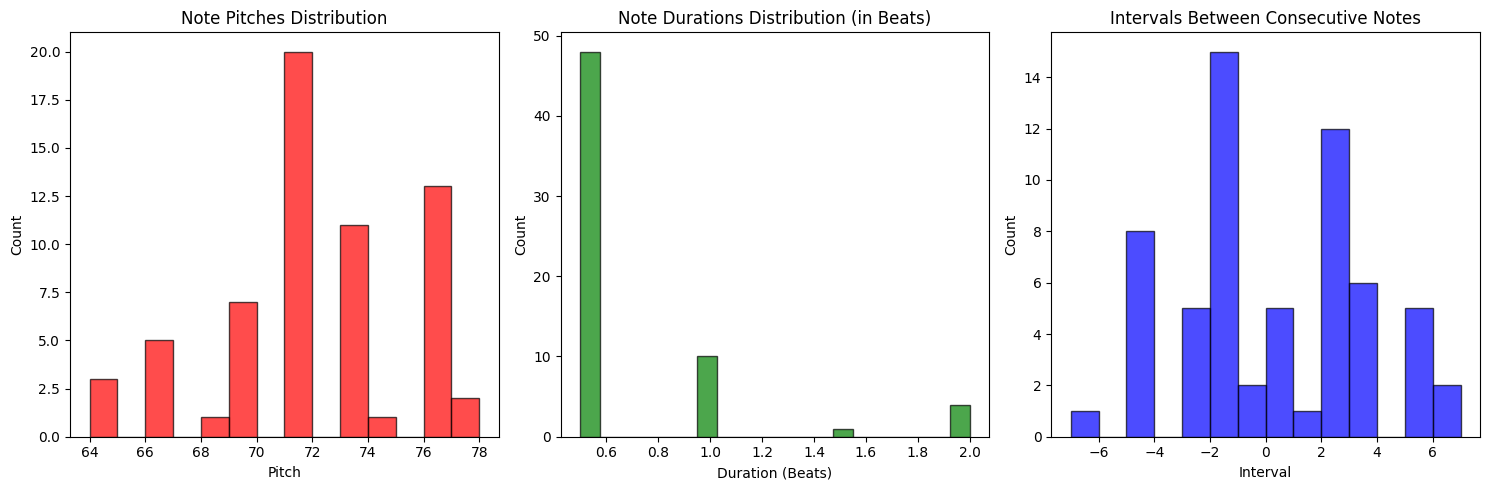

In [7]:
def plot_midi_statistics(file_path):
    # Read MIDI file
    midi_file = mt.MidiFile(file_path)
    ticks_per_beat = midi_file.ticks_per_beat

    # Extract data
    pitches = [note.pitch for note in midi_file.instruments[0].notes]
    durations = [(note.end - note.start) / ticks_per_beat for note in midi_file.instruments[0].notes]
    intervals = [y - x for x, y in zip(pitches[:-1], pitches[1:])]

    # Plot histograms
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.hist(pitches, bins=range(min(pitches), max(pitches) + 1), alpha=0.7, color='r', edgecolor='black')
    plt.title('Note Pitches Distribution')
    plt.xlabel('Pitch')
    plt.ylabel('Count')

    plt.subplot(132)
    plt.hist(durations, bins=20, alpha=0.7, color='g', edgecolor='black')
    plt.title('Note Durations Distribution (in Beats)')
    plt.xlabel('Duration (Beats)')
    plt.ylabel('Count')

    plt.subplot(133)
    plt.hist(intervals, bins=range(min(intervals), max(intervals) + 1), alpha=0.7, color='b', edgecolor='black')
    plt.title('Intervals Between Consecutive Notes')
    plt.xlabel('Interval')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()
    
plot_midi_statistics(f"{midi_file}")


In [8]:
def get_distribution(values):
    set_values = set(values)
    value_distribution = {value: 0 for value in set_values}
    for value in values:
        value_distribution[value] += 1
    return value_distribution

def sample_from_distribution(distribution):
    # Transform to probabilities
    sum_values = sum(distribution.values())
    probabilities = np.array(list(distribution.values()))/sum_values
    return np.random.choice(list(distribution.keys()), p=probabilities)

def note_generator_by_interval_distribution(mido_obj, beat_resol, note_pitches, note_durations, num_notes=30):
    pitch_distribution = get_distribution(note_pitches)
    duration_distribution = get_distribution(note_durations)

    # Generate the first pitch from the distribution of initial pitches
    initial_pitch = ord(sample_from_distribution(pitch_distribution))
    prev_pitch = initial_pitch

    prev_end = 0
    for i in range(num_notes):
        # If it's the first iteration, use the initial pitch
        if i == 0:
            pitch = initial_pitch
        else:
            # Generate pitch by sampling from the distribution of intervals
            interval = ord(sample_from_distribution(pitch_distribution))
            pitch = (prev_pitch + interval)%128

        duration = ord(sample_from_distribution(duration_distribution))
        start = prev_end
        end = prev_end + duration
        velocity = np.random.randint(1, 127)
        note = ct.Note(start=start, end=end, pitch=pitch, velocity=velocity)
        mido_obj.instruments[0].notes.append(note)

        prev_end = end
        prev_pitch = pitch

midi_generator = MIDIGenerator()
mido_obj, beat_resol = midi_generator.mido_obj, midi_generator.beat_resol
midi_generator.create_instrument()

values = 'abracadabra'
file_name = 'midi/midi_by_interval_distribution_abracadabra.mid'

note_generator_by_interval_distribution(mido_obj, beat_resol, values, values)

midi_generator.create_marker()
midi_generator.write_to_file(file_name)
midi_generator.reload_and_check(file_name)

Note(velocity=116, pitch=99, start=0, end=97)
Note(velocity=88, pitch=68, start=97, end=194)
Note(velocity=71, pitch=54, start=194, end=291)
Note(velocity=18, pitch=25, start=291, end=388)
Note(velocity=117, pitch=125, start=388, end=486)
Note(velocity=17, pitch=94, start=486, end=584)
Note(velocity=47, pitch=80, start=584, end=684)
Note(velocity=46, pitch=50, start=684, end=781)
Note(velocity=2, pitch=22, start=781, end=878)
Note(velocity=94, pitch=8, start=878, end=975)
Note(velocity=77, pitch=105, start=975, end=1089)
Note(velocity=103, pitch=91, start=1089, end=1186)
Note(velocity=109, pitch=60, start=1186, end=1300)
Note(velocity=113, pitch=30, start=1300, end=1398)
Note(velocity=117, pitch=0, start=1398, end=1512)
Note(velocity=78, pitch=114, start=1512, end=1609)
Note(velocity=95, pitch=83, start=1609, end=1707)
Note(velocity=77, pitch=52, start=1707, end=1807)
Note(velocity=114, pitch=21, start=1807, end=1904)
Note(velocity=2, pitch=118, start=1904, end=2001)
Note(velocity=88, 

### - Partie 3 : Matrices de transition

Transition matrix for pitches: [array([0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. ]), array([0.6, 0. , 0. , 0.4, 0. , 0. , 0. , 0. , 0. ]), array([0., 0., 0., 1., 0., 0., 0., 0., 0.]), array([0.        , 0.14285714, 0.14285714, 0.        , 0.57142857,
       0.        , 0.        , 0.14285714, 0.        ]), array([0. , 0.2, 0. , 0.1, 0.2, 0.3, 0. , 0.2, 0. ]), array([0.        , 0.        , 0.        , 0.        , 0.63636364,
       0.        , 0.        , 0.36363636, 0.        ]), array([0., 0., 0., 0., 0., 1., 0., 0., 0.]), array([0.        , 0.        , 0.        , 0.07692308, 0.30769231,
       0.30769231, 0.07692308, 0.07692308, 0.15384615]), array([0., 0., 0., 0., 0., 0., 0., 1., 0.])]
Transition matrix for durations: [array([0.77083333, 0.16666667, 0.0625    , 0.        ]), array([0.7, 0.2, 0.1, 0. ]), array([0.66666667, 0.        , 0.        , 0.33333333]), array([1., 0., 0., 0.])]


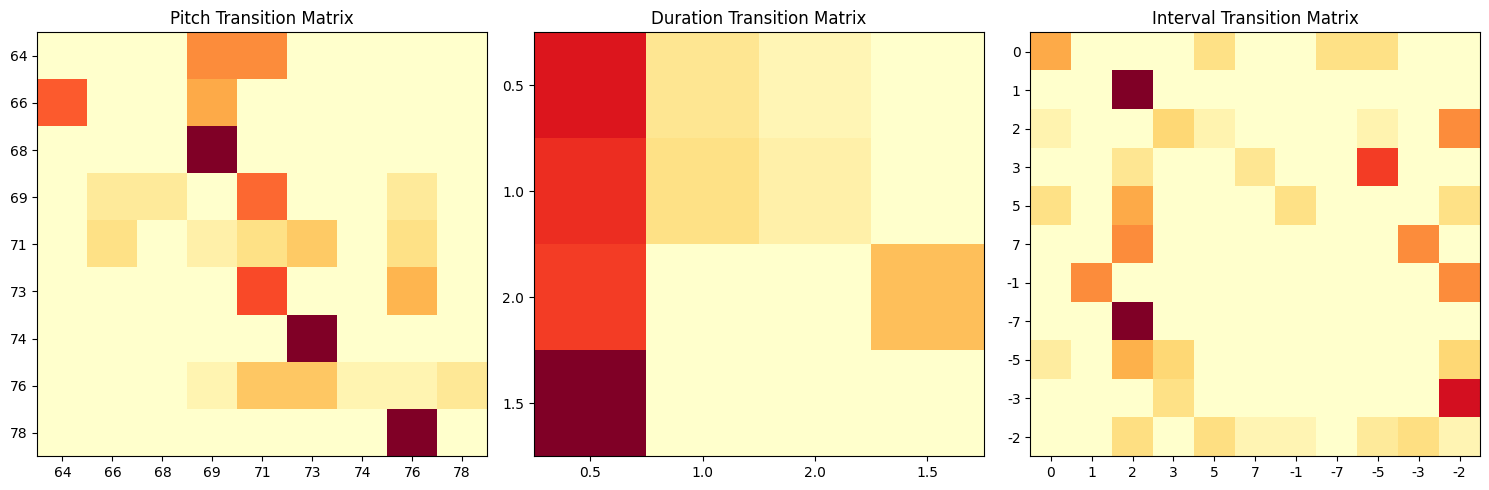

In [9]:
from sklearn.preprocessing import normalize

def get_transition_matrix(values, norm=True):
    list_distinct_values = np.array(list(set(values)))
    nb_distinct_values = len(list_distinct_values)
    transition_matrix = np.zeros((nb_distinct_values, nb_distinct_values))
    for i in range(1, len(values)):
        current_value = values[i-1]
        next_value = values[i]
        current_index = np.where(list_distinct_values == current_value)[0][0]
        next_index = np.where(list_distinct_values == next_value)[0][0]
        transition_matrix[current_index, next_index] += 1
    if norm:
        transition_matrix = normalize(transition_matrix, norm='l1', axis=1)
    return list(list_distinct_values), list(transition_matrix)


def plot_transition_matrix(ax, matrix, unique_values, title):
    im = ax.imshow(matrix, cmap='YlOrRd', interpolation='nearest', aspect='auto')

    ax.set_xticks(np.arange(len(unique_values)))
    ax.set_yticks(np.arange(len(unique_values)))
    ax.set_xticklabels(unique_values)
    ax.set_yticklabels(unique_values)
    ax.set_title(title)
    return im

def load_midi_file(file_path):
    midi_obj = mt.MidiFile(file_path)
    try :
        midi_obj.instruments[0].notes
    except:
        print(f"Error: No notes found in the MIDI file at path '{file_path}'.")
        return None
    pitches = [note.pitch for note in midi_obj.instruments[0].notes]
    durations = [(note.end - note.start) / midi_obj.ticks_per_beat for note in midi_obj.instruments[0].notes]
    intervals = [y - x for x, y in zip(pitches[:-1], pitches[1:])]
    return pitches, durations, intervals



note_pitches, durations, intervals = load_midi_file('midi/shanxi-802.mid')

unique_pitches, pit_transition_matrix = get_transition_matrix(note_pitches)
unique_durations, dur_transition_matrix = get_transition_matrix(durations)
unique_intervals, inter_transition_matrix = get_transition_matrix(intervals)
print(f"Transition matrix for pitches: {pit_transition_matrix}")
print(f"Transition matrix for durations: {dur_transition_matrix}")


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

plot_transition_matrix(axs[0], pit_transition_matrix, unique_pitches, 'Pitch Transition Matrix')
plot_transition_matrix(axs[1], dur_transition_matrix, unique_durations, 'Duration Transition Matrix')
plot_transition_matrix(axs[2], inter_transition_matrix, unique_intervals, 'Interval Transition Matrix')

plt.tight_layout()
plt.show()


In [10]:
def generate_max_probability_melody(transition_matrix, unique_values, num_notes=100):
    melody = []

    # Choose the first value randomly
    current_value = np.random.choice(unique_values)
    melody.append(current_value)

    for _ in range(num_notes - 1):
        current_index = unique_values.index(current_value)
        # maximize probability
        next_index = np.argmax(transition_matrix[current_index])
        next_value = unique_values[next_index]

        melody.append(next_value)
        current_value = next_value

    return melody


def generate_random_melody(transition_matrix, unique_values, num_notes=30):
    melody = []

    # Choose the first value randomly
    current_value = np.random.choice(unique_values)
    melody.append(current_value)

    for _ in range(num_notes - 1):
        current_index = unique_values.index(current_value)
        # pick randomly
        next_index = np.random.choice(len(unique_values), p=transition_matrix[current_index])
        next_value = unique_values[next_index]

        melody.append(next_value)
        current_value = next_value

    return melody


max_prob_pitch_melody = generate_max_probability_melody(pit_transition_matrix, unique_pitches)
max_prob_duration_melody = generate_max_probability_melody(dur_transition_matrix, unique_durations)
max_prob_interval_melody = generate_max_probability_melody(inter_transition_matrix, unique_intervals)

random_pitch_melody = generate_random_melody(pit_transition_matrix, unique_pitches)
random_duration_melody = generate_random_melody(dur_transition_matrix, unique_durations)
random_interval_melody = generate_random_melody(inter_transition_matrix, unique_intervals)


print("\nPitch Melody with Max Probability:", max_prob_pitch_melody)
print("Duration Melody with Max Probability:", max_prob_duration_melody)
print("Interval Melody with Max Probability:", max_prob_interval_melody)


print("\nRandom Pitch Melody:", random_pitch_melody)
print("Random Duration Melody:", random_duration_melody)
print("Random Interval Melody:", random_interval_melody)

def save_midi(pitch_values, duration_values, name):
    generated_midi = mid_parser.MidiFile()
    generated_track = ct.Instrument(program=0, is_drum=False, name='generated melody track')
    start_time = 0
    for value, duration in zip(pitch_values, duration_values):
        end_time = int(start_time + duration * generated_midi.ticks_per_beat)
        note = ct.Note(start=start_time, end=end_time, pitch=value, velocity=64)
        generated_track.notes.append(note)
        start_time = end_time
    generated_midi.instruments = [generated_track]
    generated_midi.dump("midi/"+name)


save_midi([ int(val) for val in max_prob_pitch_melody], [ float(val) for val in max_prob_duration_melody ], "max_prob.midi")
save_midi([ int(val) for val in random_pitch_melody], [ float(val) for val in random_duration_melody ], "random.midi")



Pitch Melody with Max Probability: [np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73), np.int64(71), np.int64(73

### - Partie 4 : Apprentissage sur un corpus

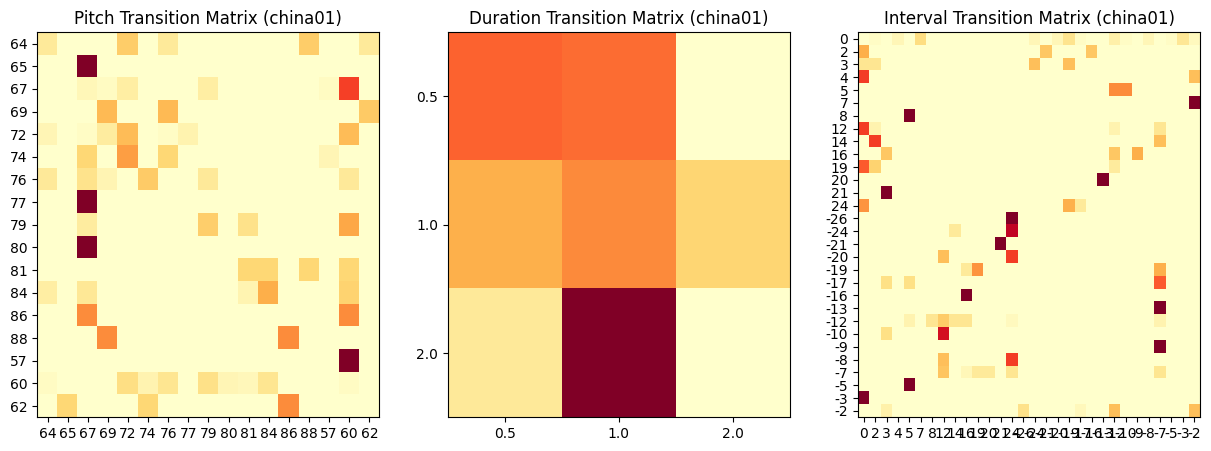

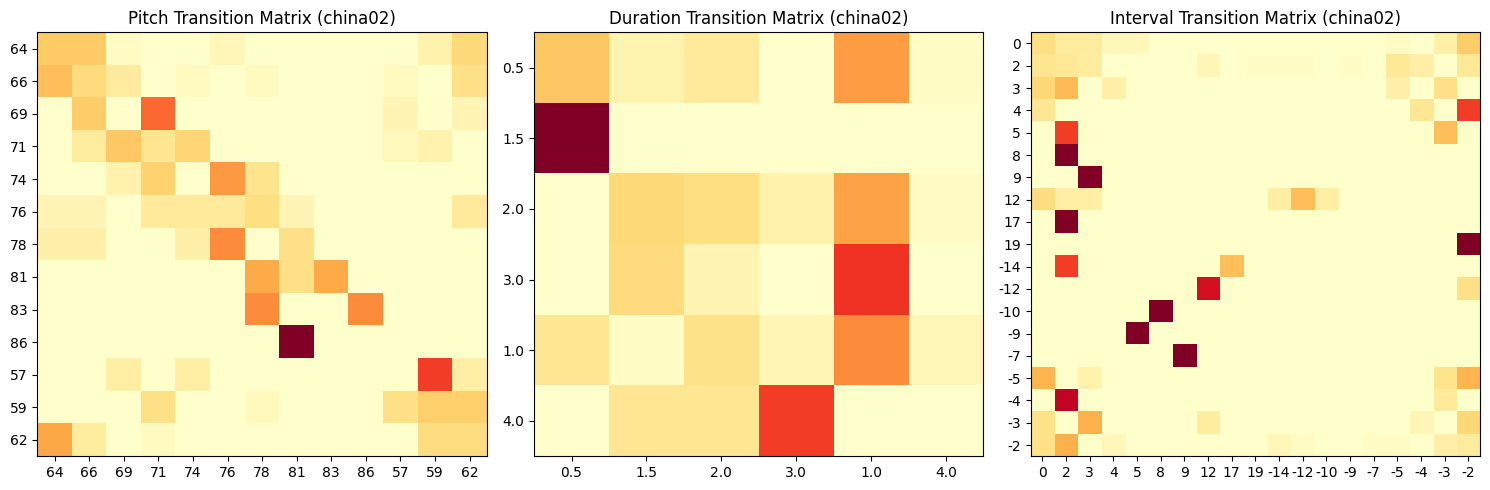

In [11]:
note_pitches_01, durations_01, intervals_01 = load_midi_file('china/china/china01.mid')
note_pitches_02, durations_02, intervals_02 = load_midi_file('china/china/china02.mid')


unique_pitches_01, pit_transition_matrix_01 = get_transition_matrix(note_pitches_01)
unique_durations_01, dur_transition_matrix_01 = get_transition_matrix(durations_01)
unique_intervals_01, inter_transition_matrix_01 = get_transition_matrix(intervals_01)


unique_pitches_02, pit_transition_matrix_02 = get_transition_matrix(note_pitches_02)
unique_durations_02, dur_transition_matrix_02 = get_transition_matrix(durations_02)
unique_intervals_02, inter_transition_matrix_02 = get_transition_matrix(intervals_02)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plot_transition_matrix(axs[0], pit_transition_matrix_01, unique_pitches_01, 'Pitch Transition Matrix (china01)')
plot_transition_matrix(axs[1], dur_transition_matrix_01, unique_durations_01, 'Duration Transition Matrix (china01)')
plot_transition_matrix(axs[2], inter_transition_matrix_01, unique_intervals_01, 'Interval Transition Matrix (china01)')

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plot_transition_matrix(axs[0], pit_transition_matrix_02, unique_pitches_02, 'Pitch Transition Matrix (china02)')
plot_transition_matrix(axs[1], dur_transition_matrix_02, unique_durations_02, 'Duration Transition Matrix (china02)')
plot_transition_matrix(axs[2], inter_transition_matrix_02, unique_intervals_02, 'Interval Transition Matrix (china02)')
plt.tight_layout()
plt.show()


In [12]:
def load_corpus(directory):
    midi_files = [f for f in os.listdir(directory) if f.lower().endswith(('.mid'))]
    # print(f"mid files: {midi_files}")

    pit_transition_mat = []
    dur_transition_mat = []
    inter_transition_mat = []
    _unique_pitches = []
    _unique_durations = []
    _unique_intervals = []

    for midi_file in midi_files:
        file_name = os.path.join(directory, midi_file)
        
        try :
            (note_pitches, durations, intervals) = load_midi_file(file_name)
        except:
            # print(f"Error: No notes found in the MIDI file at path '{file_name}'.")
            continue

        unique_pitches, pit_transition_matrix = get_transition_matrix(note_pitches, norm=False)
        unique_durations, dur_transition_matrix = get_transition_matrix(durations, norm=False)
        unique_intervals, inter_transition_matrix = get_transition_matrix(intervals, norm=False)
        
        
        _unique_pitches = list(set(_unique_pitches + unique_pitches))
        _unique_durations = list(set(_unique_durations + unique_durations))
        _unique_intervals = list(set(_unique_intervals + unique_intervals))
        
        def combine(matrix, new_matrix, unique_values, new_unique_values, _unique_values):
            tot_matrix = np.zeros((len(_unique_values), len(_unique_values)))
            
            for i, val1 in enumerate(_unique_values):
                for j, val2 in enumerate(_unique_values):
                    if val1 in unique_values and val2 in unique_values:
                        print(unique_values.index(val1))
                        tot_matrix[i][j] += matrix[unique_values.index(val1), unique_values.index(val2)]
                    if val1 in new_unique_values and val2 in new_unique_values:
                        tot_matrix[i, j] += new_matrix[new_unique_values.index(val1), new_unique_values.index(val2)]
            
            return tot_matrix

        pit_transition_mat = combine(pit_transition_mat, pit_transition_matrix, unique_pitches, unique_pitches, _unique_pitches)
        dur_transition_mat = combine(dur_transition_mat, dur_transition_matrix, unique_durations, unique_durations, _unique_durations)
        inter_transition_mat = combine(inter_transition_mat, inter_transition_matrix, unique_intervals, unique_intervals, _unique_intervals)
        
        
    return pit_transition_mat,\
            dur_transition_mat,\
            inter_transition_mat,\
            _unique_pitches,\
            _unique_durations,\
            _unique_intervals



pit_transition_matrix, dur_transition_matrix, inter_transition_matrix, unique_pitches, unique_durations, unique_intervals = load_corpus('china/china')

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plot_transition_matrix(axs[0], pit_transition_matrix, unique_pitches, 'Pitch Transition Matrix (china02)')
plot_transition_matrix(axs[1], dur_transition_matrix, unique_durations, 'Duration Transition Matrix (china02)')
plot_transition_matrix(axs[2], inter_transition_matrix, unique_intervals, 'Interval Transition Matrix (china02)')
plt.tight_layout()
plt.show()

def train_melody_model(directory_path, num_iterations=1000, num_melodies_per_iteration=1):
    # Load MIDI files from the directory
    midi_files = [f for f in os.listdir(directory_path) if f.lower().endswith(('.mid', '.midi'))]

    if not midi_files:
        raise ValueError("No MIDI files found in the specified directory.")

    pit_transition_matrices, dur_transition_matrices, inter_transition_matrices, unique_pitches_list, unique_durations_list, unique_intervals_list = load_corpus(directory_path)

    best_melody = None
    best_log_probability = float('inf')
    for iteration in range(num_iterations):
        print(f"{((iteration+1)/num_iterations)*100:.2f}%", end="\r")
        current_melody = None
        current_log_probability = float('inf')
        
        # Generate multiple melodies and keep the most probable one
        for _ in range(num_melodies_per_iteration):
            random_pitch_melody, log_prob_pitch = generate_random_melody(
                pit_transition_matrices, unique_pitches_list
            )

            random_duration_melody, log_prob_duration = generate_random_melody(
                dur_transition_matrices, unique_durations_list
            )

            random_interval_melody, log_prob_interval = generate_random_melody(
                inter_transition_matrices, unique_intervals_list
            )

            # Combine the probabilities of pitch, duration, and interval
            total_log_probability = log_prob_pitch + log_prob_duration + log_prob_interval

            # Update the current melody if the new one has a higher probability
            if total_log_probability < current_log_probability:
                current_log_probability = total_log_probability
                current_melody = (random_pitch_melody, random_duration_melody, random_interval_melody)

        # Update the best melody if the new one has a higher probability
        if current_log_probability < best_log_probability:
            best_log_probability = current_log_probability
            best_melody = current_melody

    # Print or use the best melody as needed
    print("Best Melody (Pitch, Duration, Interval):")
    print(best_melody)
    print("Negative Log Probability of the Best Melody:", best_log_probability)
    return best_melody, best_log_probability


0


TypeError: list indices must be integers or slices, not tuple

In [ ]:
best_china_melody, best_china_log_probability = train_melody_model('china/china/')

Error: No notes found in the MIDI file at path 'china/china/han0953.mid'.


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2239,) + inhomogeneous part.

### - Partie 5 : Comparaison avec un autre corpus